T = 100, Minimizer: [0.05342569 0.23254132], Final Value: 5.475040974982167, Error: 547504097.50%
T = 500, Minimizer: [0.05342569 0.23254132], Final Value: 5.47504097498216, Error: 547504097.50%
T = 1000, Minimizer: [0.05342569 0.23254132], Final Value: 5.47504097498216, Error: 547504097.50%
T = 5000, Minimizer: [0.05342569 0.23254132], Final Value: 5.47504097498216, Error: 547504097.50%
T = 10000, Minimizer: [0.05342569 0.23254132], Final Value: 5.47504097498216, Error: 547504097.50%
T = 50000, Minimizer: [0.05342569 0.23254132], Final Value: 5.47504097498216, Error: 547504097.50%
T = 100000, Minimizer: [0.05342569 0.23254132], Final Value: 5.47504097498216, Error: 547504097.50%
T = 500000, Minimizer: [0.05342569 0.23254132], Final Value: 5.47504097498216, Error: 547504097.50%
T = 1000000, Minimizer: [0.05342569 0.23254132], Final Value: 5.47504097498216, Error: 547504097.50%
T = 5000000, Minimizer: [0.05342569 0.23254132], Final Value: 5.47504097498216, Error: 547504097.50%


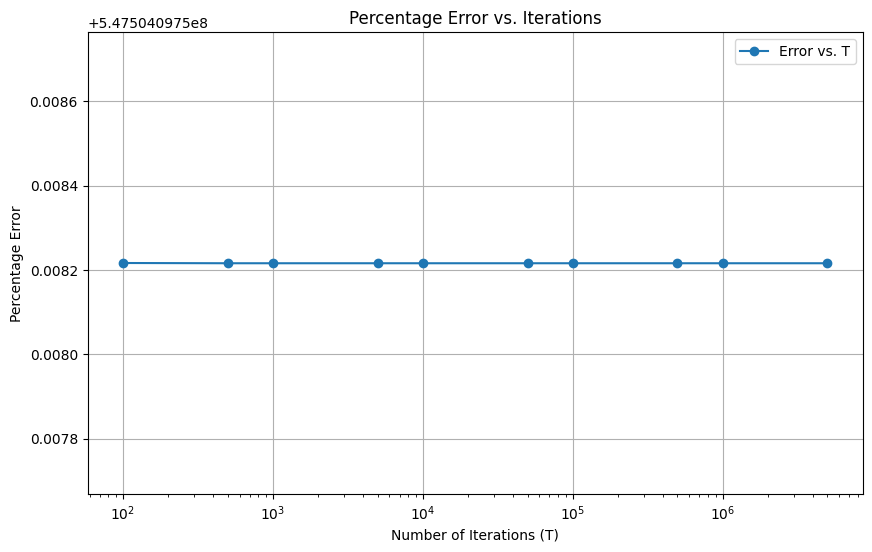

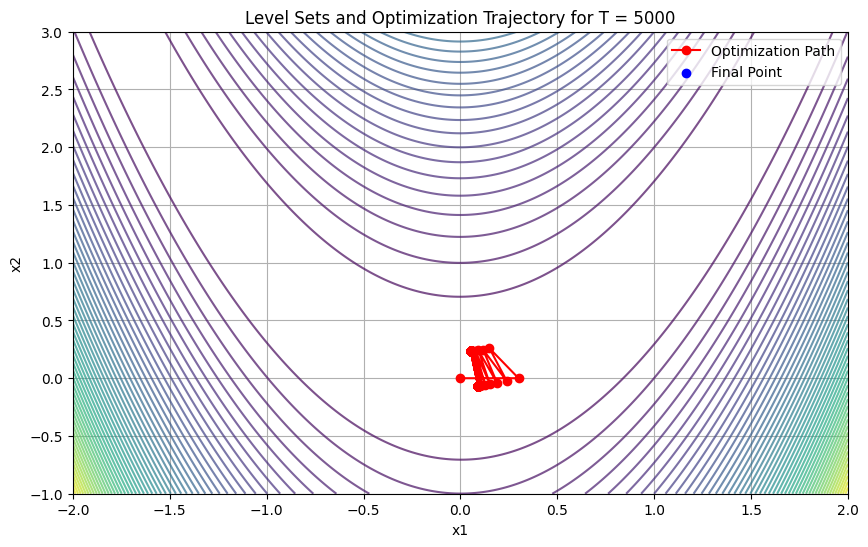

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function
def objective_function(x):
    return 100 * (x[1] - x[0]**2)**2 + (0.5 - x[0])**2

# Define the gradient of the function
def compute_gradient(x):
    grad = np.zeros(2)
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (0.5 - x[0])
    grad[1] = 200 * (x[1] - x[0]**2)
    # Clip gradients to avoid overflow
    grad = np.clip(grad, -1e4, 1e4)  # Adjust clipping threshold if necessary
    return grad

# Proximal Gradient Descent Algorithm
def proximal_gradient_descent(x0, step_size, max_iterations):
    x = x0.copy()
    trajectory = [x.copy()]  # To store the path for plotting
    
    for _ in range(max_iterations):
        grad = compute_gradient(x)
        grad_norm = np.linalg.norm(grad)
        
        # Dynamically adjust step size based on gradient norm
        if grad_norm > 1e-6:
            step = step_size / grad_norm
        else:
            step = step_size
        
        # Update the position
        x -= step * grad
        trajectory.append(x.copy())
    
    final_value = objective_function(x)
    return x, final_value, np.array(trajectory)

# Parameters
x0 = np.array([0.0, 0.0])  # Initial point
eta = 0.3  # Step size
T_values = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]
theoretical_min = 0  # Assume theoretical minimum is 0 for comparison

# Arrays to store results
errors = []
final_values = []
trajectories = []

# Run the algorithm for different T values
for T in T_values:
    minimizer, final_value, trajectory = proximal_gradient_descent(x0, eta, T)
    error = 100 * abs(final_value - theoretical_min) / max(abs(theoretical_min), 1e-6)  # Percentage error
    errors.append(error)
    final_values.append(final_value)
    trajectories.append(trajectory)
    print(f"T = {T}, Minimizer: {minimizer}, Final Value: {final_value}, Error: {error:.2f}%")

# Plot Error vs T
plt.figure(figsize=(10, 6))
plt.plot(T_values, errors, marker='o', label="Error vs. T")
plt.xscale("log")
plt.xlabel("Number of Iterations (T)")
plt.ylabel("Percentage Error")
plt.title("Percentage Error vs. Iterations")
plt.grid(True)
plt.legend()
plt.show()

# Plot Level Sets and Trajectory for T = 5000 (or any specific T)
T_index = 3  # Choose the index of T to visualize (e.g., 5000)
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = 100 * (Y - X**2)**2 + (0.5 - X)**2

trajectory = trajectories[T_index]

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis', alpha=0.7)
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], marker="o", color="red", label="Optimization Path")
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color="blue", label="Final Point")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title(f"Level Sets and Optimization Trajectory for T = {T_values[T_index]}")
plt.legend()
plt.grid(True)
plt.show()